In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, AveragePooling2D

In [3]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
model = Sequential()

## Convolutional Layer 1
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='valid', strides=1, input_shape=(28, 28, 1), name='conv2d_l1'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid', name='average_pooling_l1'))

## Convolutional Layer 2
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid', strides=1, name='conv2d_l2'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid', name='average_pooling_l2'))

model.add(Flatten(name='flatten'))

## Fully Connected Layer 1
model.add(Dense(units=120, activation='relu', name='fully_connected_l1'))

## Fully Connected Layer 2
model.add(Dense(units=84, activation='relu', name='fully_connected_l2'))

## Output Layer
model.add(Dense(units=10, activation='softmax', name='output_layer'))

model.name = 'LeNet-5'

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "LeNet-5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_l1 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling_l1              │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_l2 (Conv2D)              │ (None, 10, 10, 32)     │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling_l2              │ (None, 5, 5, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_l1 (Dense)      │ (None, 120)            │        96,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_l2 (Dense)      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,050 (425.98 KB)

 Trainable params: 109,050 (425.98 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.save('lenet-5.keras')

## Train the model

In [8]:
history = model.fit(X, y, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8216 - loss: 2.1039 - val_accuracy: 0.9806 - val_loss: 0.0594
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9796 - loss: 0.0638 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9872 - val_loss: 0.0468
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9780 - val_loss: 0.0727
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9868 - val_loss: 0.0491
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9864 - val_loss: 0.0533
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9898 - val_loss: 0.0445
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9962 - loss: 0.0125 - val_

In [9]:
history = history.history
history_df = pd.DataFrame(history)

In [10]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.920250,0.542174,0.9806,0.059411
1,0.981100,0.060691,0.9858,0.046466
2,0.987517,0.040892,0.9872,0.046783
3,0.990600,0.030637,0.9780,0.072654
4,0.992667,0.023634,0.9868,0.049137
5,0.994217,0.018753,0.9864,0.053270
6,0.994983,0.016570,0.9898,0.044502
7,0.995800,0.013446,0.9890,0.048757
8,0.996517,0.012073,0.9895,0.041985
9,0.997183,0.009316,0.9885,0.056050


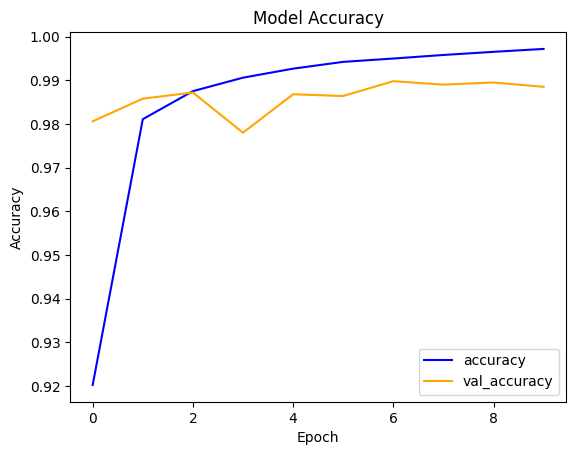

In [11]:
plt.plot(history['accuracy'], label='accuracy', color='blue')
plt.plot(history['val_accuracy'], label='val_accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [12]:
model.save('lenet-5.keras')

## Predictions

In [22]:
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Predicted: 9, Actual: 9


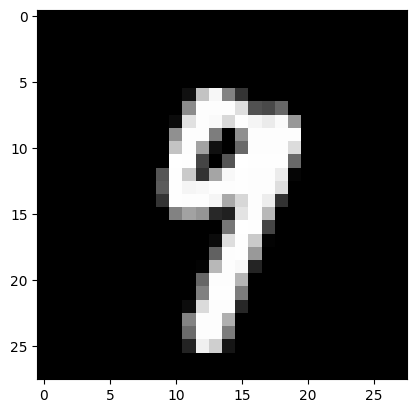

In [44]:
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')